# 0. Introduction

Context
The FIFA World Cup is the most prestigious football tournament in the world. The championship has been awarded every four years since the start of the tournament in 1930.

The current format involves a qualification phase, which takes place over the preceding three years, to determine which teams quality for the tournament. In the tournament, 32 teams, including the host nation, compete for the title at different stadiums in the host country.

The reigning champion is France, which beat Croatia in the 2018 tournament in Russia. Qatar will host the 2022 tournament, for which the first match will be played in November.

This dataset provides a complete overview of all international soccer matches played since the 90s. On top of that, the strength of each team is provided by incorporating actual FIFA rankings as well as player strengths based on the EA Sport FIFA video game.

NOTE: dataset was updated on 28-08-2022

# 1. Obtaining data

## 1.1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [2]:
pd.options.display.max_columns = 999

## 1.2. Collecting Initial Data 

In [3]:
df_raw = pd.read_csv('./data/01_raw/international_matches.csv')

In [4]:
df_raw.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [6]:
# ranking  winners by scores
df_raw.loc[df_raw.home_team_score > df_raw.away_team_score, 'winner'] = df_raw.home_team
df_raw.loc[df_raw.home_team_score < df_raw.away_team_score, 'winner'] = df_raw.away_team

# excluding draws
df_raw = df_raw[df_raw['winner'].notna()]

In [7]:
# percentage of teams compared to others
winners_percent = (df_raw.winner.value_counts()/df_raw.shape[0])*100

percent_teams_classifiers = {'teams':winners_percent.index,
    'percent_winners':winners_percent.values}

df_model_input = pd.DataFrame(percent_teams_classifiers)

df_model_input.head(10)

,teams,percent_winners
0,Brazil,1.603162
1,Mexico,1.460415
2,Spain,1.323158
3,USA,1.312177
4,Germany,1.301197
5,Saudi Arabia,1.295707
6,France,1.246294
7,Japan,1.224333
8,Argentina,1.163940
9,IR Iran,1.163940


The idea is always to show the strongest team, so we can create a comparison with other football teams.<br>
In the final dispute we will have a more realistic comparison, where both teams will have a 100% comparison

In [8]:
outname = 'df_model_input.csv'

outdir = './data/03_model_input'

if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir,outname)

df_model_input.to_csv(fullname, index=False)

C:\Users\user\AppData\Local\Temp\ipykernel_4352\2191868689.py:24: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


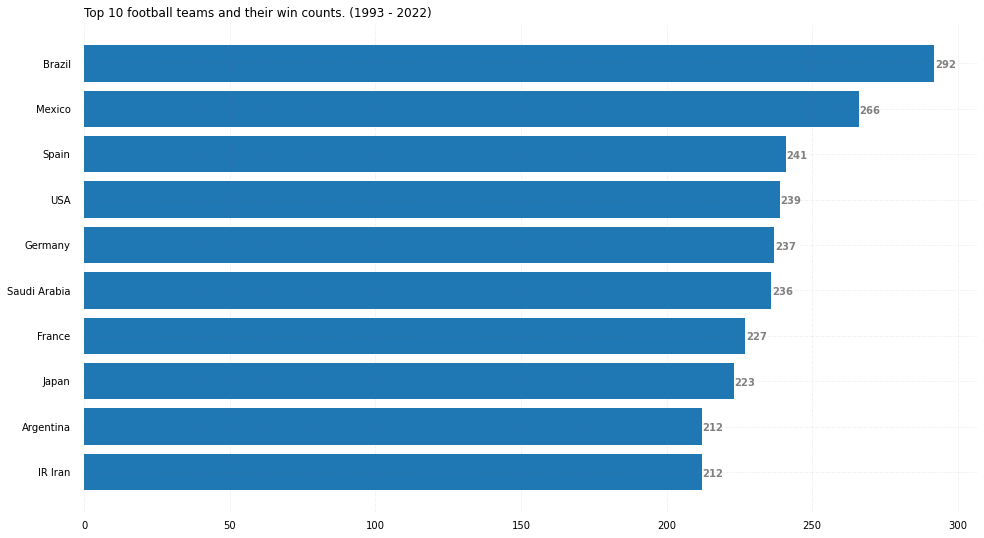

In [9]:
# Top 10 winners
team_name = df_raw.winner.value_counts().index[:10]
winner_count = df_raw.winner.value_counts().values[:10]

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(team_name, winner_count)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Top 10 football teams and their win counts. (1993 - 2022)',
             loc ='left', )

 
# Show Plot
plt.show()

In [10]:
# teams that will play.
teams=['Netherlands','USA','Argentina','Australia','Japan','Croatia','Brazil','Korea Republic','England','Senegal','France','Poland','Morocco','Spain','Portugal','Switzerland']

In [11]:
df_intermediate = df_raw.copy()
df_intermediate = df_intermediate[df_intermediate['home_team'].isin(teams)]
df_intermediate = df_intermediate[df_intermediate['away_team'].isin(teams)]

df_intermediate = df_intermediate.reset_index()
df_intermediate = df_intermediate.drop('index',axis=1)


In [12]:
df_intermediate = df_intermediate.drop(df_intermediate.iloc[0:,3:9],axis=1)
df_intermediate = df_intermediate.drop(df_intermediate.iloc[0:,5:19],axis=1)

df_intermediate

,date,home_team,away_team,home_team_score,away_team_score,winner
0,1993-09-08,England,Poland,3,0,England
1,1993-09-26,Korea Republic,Australia,1,0,Korea Republic
2,1993-10-13,Netherlands,England,2,0,Netherlands
3,1993-10-13,Portugal,Switzerland,1,0,Portugal
4,1993-10-25,Japan,Korea Republic,1,0,Japan
...,...,...,...,...,...,...
423,2022-06-05,Portugal,Switzerland,4,0,Portugal
424,2022-06-06,Japan,Brazil,0,1,Brazil
425,2022-06-09,Switzerland,Spain,0,1,Spain
426,2022-06-12,Switzerland,Portugal,1,0,Switzerland


In [13]:
df_intermediate.date = pd.to_datetime(df_intermediate.date)

In [14]:
outname = 'df_intermediate.csv'

outdir = './data/02_intermediate'

if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir,outname)

df_intermediate.to_csv(fullname, index=False)